# Superhero NLP Notebook

Trying to determine if superheros are good or evil based on thier historical text. Not sure this is possible but it should be fun anyway!

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import string, re
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Data

In [4]:
df = pd.read_csv('data/superheroes_nlp_dataset.csv')
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [7]:
df.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,...,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,...,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


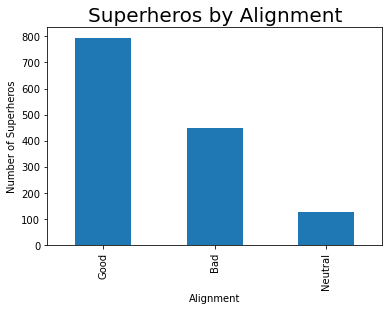

In [14]:
df.alignment.value_counts().plot(kind='bar')
plt.xlabel('Alignment')  
plt.ylabel('Number of Superheros')  
plt.title("Superheros by Alignment", fontsize=20,) 
plt.show()

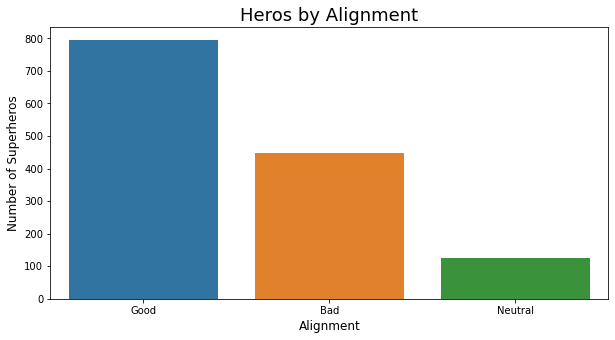

In [32]:
hero_count  = df['alignment'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=hero_count.index, y=hero_count.values)
plt.title('Heros by Alignment', fontsize=18)
plt.ylabel('Number of Superheros', fontsize=12)
plt.xlabel('Alignment', fontsize=12)
plt.show()

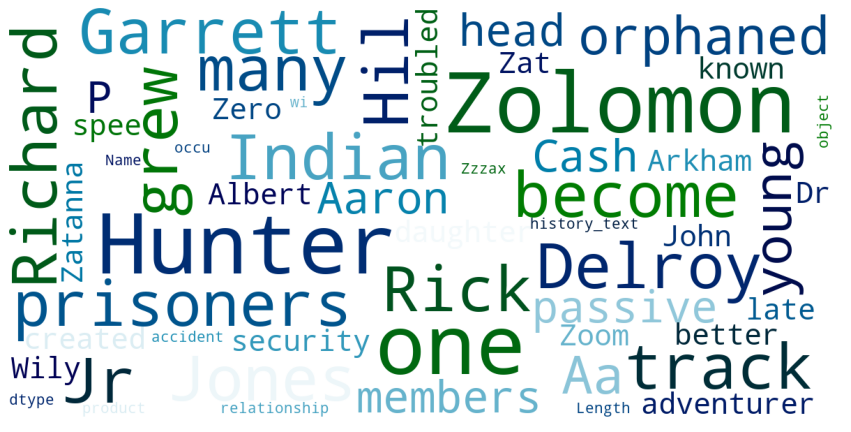

In [39]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_font_size=40,
        max_words=150,
        colormap='ocean',
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['history_text'])

In [51]:
df.overall_score.unique()

array(['6', '10', '20', '12', '5', '8', '9', '22', '13', '29', '∞', '7',
       '19', '2', '15', '14', '50', '34', '35', '-', '4', '37', '3', '70',
       '11', '21', '67', '32', '222', '1', '16', '18', '80', '17', '28',
       '42', '117', '30', '71', '130', '84', '73', '23', '112', '229',
       '24', '61', '120', '40', '142', '124', '211', '27', '54', '33',
       '57', '169', '226', '77', '237', '26', '41', '38', '47', '46',
       '87', '25', '60', '82', '89', '78', '69', '43', '66', '62', '31',
       '64', '49', '58', '126', '163', '65', '100', '108', '125', '94',
       '75', '53', '152', '165', '83', '68', '146'], dtype=object)

In [52]:
df.overall_score.value_counts()

6      162
7      147
8      136
-      107
5      100
      ... 
42       1
112      1
165      1
117      1
83       1
Name: overall_score, Length: 93, dtype: int64

In [49]:
df.loc[df.overall_score == '∞']

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
11,Abraxas,Abraxas,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",100,100,100,100,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
153,Beyonder,NaN,NaN,∞,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
174,Black Alice,Lori Zechlin,Lori Zechlin,∞,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
376,Death Of The Endless,Death,Death Of The Endless,∞,Death of the Endless came into existence short...,Personification of Death: One of the seven End...,100,100,100,100,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
450,Eru Iluvatar,Eru,NaN,∞,Eru is the supreme deity of Arda. He was the s...,NaN,100,100,100,100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
482,First Spinjitzu Master,Unknown,Unknown,∞,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
526,Golden Master's Mech,Overlord,NaN,∞,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
795,Life Entity,The Life Entity,NaN,∞,NaN,Powers It's the manifested form of life and c...,100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
803,Little Krishna,Krishna,Krishna,∞,NaN,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
809,Living Tribunal,NaN,NaN,∞,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [56]:
df.overall_score.describe()

count     1450
unique      93
top          6
freq       162
Name: overall_score, dtype: object

In [59]:
df['rank'] = df.overall_score.copy()

In [60]:
df.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,...,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,...,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.isna().sum()

name                    2
real_name             149
full_name             494
overall_score           0
history_text           90
                     ... 
has_durability         67
has_stamina            67
has_agility            67
has_super_strength     67
rank                    0
Length: 82, dtype: int64

In [58]:
df.overall_score.astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '∞'

In [91]:
# Average number of words per string of history_text

In [78]:
df.history_text[0]

"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he tested positive for steroids, he lost his three gold medals. In despair, he turned to religion, specifically the Triune Understanding. This group's founder, Jonathan Tremont, had found one of three fragments of a mysterious object and used it to give Garrett the powers of 3-D Man. Garrett assumed that his powers were because of his newfound spiritual enlightenment, and Tremont never disabused him of the notion."

In [92]:
df['history_text'].str.split().str.len()

0         84.0
1        675.0
2        988.0
3        988.0
4         26.0
         ...  
1445     254.0
1446    8472.0
1447      64.0
1448    1208.0
1449    1006.0
Name: history_text, Length: 1450, dtype: float64

In [94]:
df['history_text'].str.split().str.len().mean()

660.3691176470588

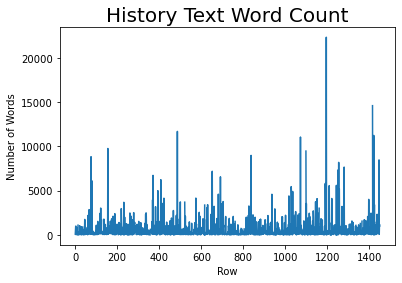

In [96]:
df['history_text'].str.split().str.len().plot()
plt.xlabel('Row')  
plt.ylabel('Number of Words')  
plt.title("History Text Word Count", fontsize=20,) 
plt.show()

In [97]:
df['history_text'].str.split().str.len().max()

22326.0

# Cleaning

# Train/Test Split

# Model 1


# Conclusions

# Future Work